In [1]:
import sys; sys.path.insert(0, '.')
import visual
visual.display_meta_info()


| Meta          | Value          |
|:------------- | --------------:|
| Git revision  | 99ad980 |
| System        | Linux (5.16.20-200.fc35.x86_64)           |
| Processor     | Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz          |
| Memory        | 16 GB          |


***RUNID**: optiplex-2022-07-04-133316*

| malloc | description |
|:--- |:--- |
|**sys**|System alloctor|
|**mi**|MiMalloc|
|**hd**|Hoard|
|**hoard**|Hoard (MallocKit)|


---

## Normalized Time:

***Mean over 10 invocations.***

malloc,sys,mi,hd,hoard
bench,,,,
alloc-test,1.203163,0.941827,1.0,1.059869
alloc-test1,1.183114,0.945976,1.0,1.048358
barnes,1.004184,1.000769,1.0,0.997474
cache-scratch,0.998345,0.998864,1.0,1.004905
cache-scratch1,1.001684,1.00208,1.0,1.003324
cfrac,1.056208,0.969178,1.0,1.00592
espresso,1.115242,0.982119,1.0,0.99932
glibc-simple,2.050184,0.927267,1.0,1.028453
glibc-thread,0.999304,0.999398,1.0,1.000206


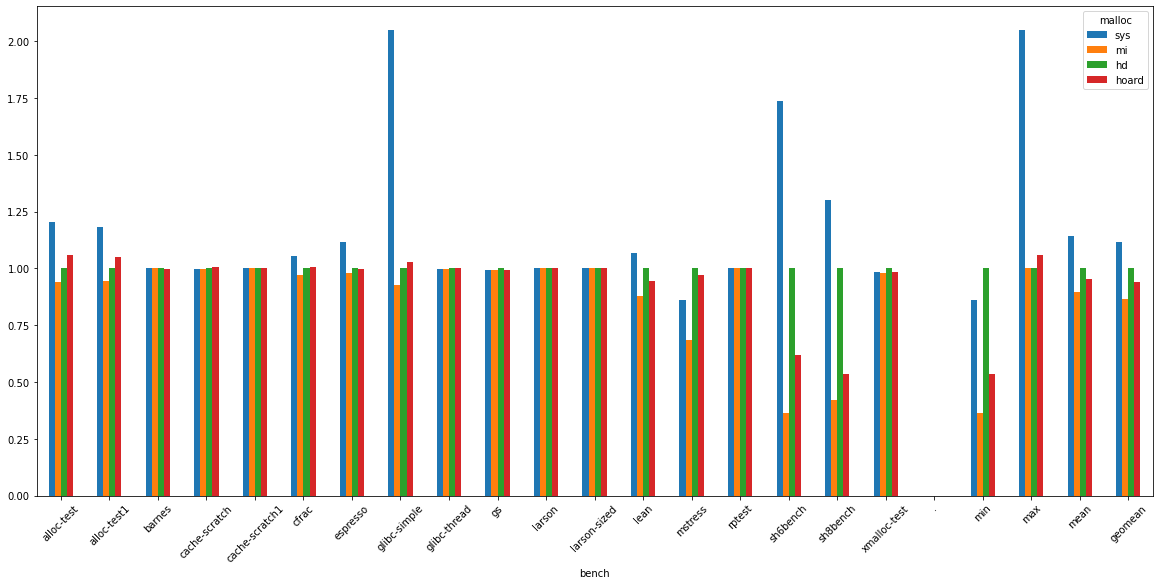

In [2]:
from visual import Pipeline

data, runid = Pipeline.load_results()
data, invocations = Pipeline.mean_over_invocation(data)
data = Pipeline.normalize(data, baseline = 'hd')
data = Pipeline.plot_bar(data, series='malloc', pivot='bench', value='duration_time', column_order = ['sys', 'mi', 'hd', 'hoard', 'buddy'])

visual.markdown(f'***RUNID**: {runid}*')
algorithms = '| malloc | description |\n|:--- |:--- |\n'
for a in data.columns.values:
    if a == 'buddy': algorithms += f'|**{a}**|Buddy allocator (MallocKit)|\n'
    elif a == 'hd': algorithms += f'|**{a}**|Hoard|\n'
    elif a == 'hoard': algorithms += f'|**{a}**|Hoard (MallocKit)|\n'
    elif a == 'mi': algorithms += f'|**{a}**|MiMalloc|\n'
    elif a == 'sys': algorithms += f'|**{a}**|System alloctor|\n'
visual.markdown(algorithms)
visual.markdown('---\n\n## Normalized Time:')
visual.markdown(f'***Mean over {invocations} invocations.***')

data